Dữ liệu đầu vào sau khi biến đổi:
   Sex  BP  Cholesterol
0    1   0            2
1    0   2            2
2    1   1            0
3    0   0            0
4    1   2            1
Giá trị mục tiêu:
0    drugA
1    drugB
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

Độ chính xác của Decision Tree: 0.00
Dự đoán từ Decision Tree: ['DrugY']

Độ chính xác của Random Forest: 0.00
Dự đoán từ Random Forest: ['DrugY']


C:\Users\Bao Tran\AppData\Local\Temp\ipykernel_25756\923029013.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Bao Tran\AppData\Local\Temp\ipykernel_25756\923029013.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Bao Tran\AppData\Local\Temp\ipykernel_25756\923029013.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

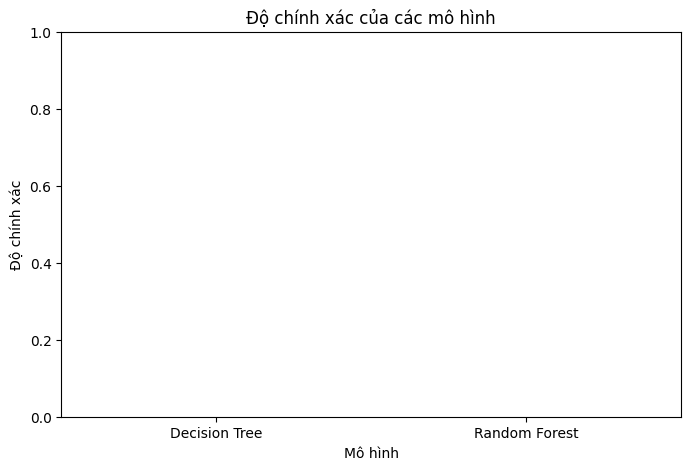

In [2]:
# Nhập thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy dữ liệu
data = pd.DataFrame({
    'Sex': ['M', 'F', 'M', 'F', 'M'],
    'BP': ['HIGH', 'NORMAL', 'LOW', 'HIGH', 'NORMAL'],
    'Cholesterol': ['NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'LOW'],
    'Drug': ['drugA', 'drugB', 'drugC', 'drugX', 'DrugY']
})

# Tạo tập X và y
X = data[['Sex', 'BP', 'Cholesterol']]
y = data['Drug']

# Chuyển đổi dữ liệu định tính sang định lượng
label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Kiểm tra dữ liệu sau khi biến đổi
print("Dữ liệu đầu vào sau khi biến đổi:")
print(X)
print("Giá trị mục tiêu:")
print(y)

# Tạo dữ liệu train test với tỉ lệ tập test là 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng mô hình Decision Tree
decisionTree = DecisionTreeClassifier(min_samples_split=2, max_depth=10)
decisionTree.fit(X_train, y_train)
y_pred_dt = decisionTree.predict(X_test)

# Độ chính xác của Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nĐộ chính xác của Decision Tree: {accuracy_dt:.2f}")

# Hiển thị dự đoán của Decision Tree
print("Dự đoán từ Decision Tree:", y_pred_dt)

# Sử dụng mô hình Random Forest
randomForest = RandomForestClassifier(n_estimators=3, random_state=42)
randomForest.fit(X_train, y_train)
y_pred_rf = randomForest.predict(X_test)

# Độ chính xác của Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nĐộ chính xác của Random Forest: {accuracy_rf:.2f}")

# Hiển thị dự đoán của Random Forest
print("Dự đoán từ Random Forest:", y_pred_rf)

# Hiển thị kết quả
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf]
})

# Vẽ biểu đồ kết quả
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0, 1)  # Giới hạn trục y từ 0 đến 1
plt.title('Độ chính xác của các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.show()
